In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl

In [3]:
df = pd.read_csv('1632300362534233.csv')
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


# Preprocessing

## missing data

In [4]:
na_features = [features for features in df.columns if df[features].isnull().sum()>1]
for feature in na_features:
    print(feature,'\t\t', np.round(df[feature].isnull().mean(),3), '%')

Address 		 0.007 %


In [3]:
df = df.replace(True, 1)
df = df.replace(False, 0)
df.tail()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
3474,86,2,1,1,1,Southern Janatabad,3.500000e+09,116666.67
3475,83,2,1,1,1,Niavaran,6.800000e+09,226666.67
3476,75,2,0,0,0,Parand,3.650000e+08,12166.67
3477,105,2,1,1,1,Dorous,5.600000e+09,186666.67
3478,82,2,0,1,1,Parand,3.600000e+08,12000.00


finding the index of NaN address

In [5]:
index_wrong_address = []
for i in range(len(df.Address)):
    if str(df.Address[i]).lower() == 'nan': 
        index_wrong_address.append(i)


finding the index of wrong Area (so big or negative area)

In [6]:
index_wrong_area = []
for i in range(len(df.Area)):
    try :
        temp_num = int(df.Area[i])
        if temp_num <= 0:
            index_wrong_area.append(i)
    except:
        index_wrong_area.append(i)

index_wrong_area

[570, 709, 807, 1604, 2171, 2802]

showing the wrong area

In [7]:
df.Area[index_wrong_area]

570       3,310,000,000 
709      16,160,000,000 
807               1,000 
1604      8,400,000,000 
2171              3,600 
2802      2,550,000,000 
Name: Area, dtype: object

Redundant Data Index Community

In [8]:
wrong_index = set(index_wrong_area + index_wrong_address)
print(f'lenth of wrong index is : {len(wrong_index)}')
print(wrong_index)

lenth of wrong index is : 29
{1796, 662, 2071, 2072, 3355, 2337, 807, 2728, 1577, 43, 570, 3262, 706, 2243, 1604, 709, 3401, 2127, 3025, 1108, 1109, 3295, 3176, 3434, 2802, 3315, 3318, 2426, 2171}


remove redundant data index

In [9]:
df = df.drop(wrong_index)
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,1,1,1,Shahran,1.850000e+09,61666.67
1,60,1,1,1,1,Shahran,1.850000e+09,61666.67
2,79,2,1,1,1,Pardis,5.500000e+08,18333.33
3,95,2,1,1,1,Shahrake Qods,9.025000e+08,30083.33
4,123,2,1,1,1,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3474,86,2,1,1,1,Southern Janatabad,3.500000e+09,116666.67
3475,83,2,1,1,1,Niavaran,6.800000e+09,226666.67
3476,75,2,0,0,0,Parand,3.650000e+08,12166.67
3477,105,2,1,1,1,Dorous,5.600000e+09,186666.67


### Normalize

getting the mean of two columns of Area and Price

In [10]:
mean_area = df.Area.mean()
mean_price = df.Price.mean()

Normalized of Area and Price

In [11]:
area = df.Area.tolist()
price = df.Price.tolist()


for i in range(len(area)):
    area[i] = int(area[i])
    price[i] = int(price[i])


max_area = max(area)
max_price = max(price)

for i in range(len(area)):
    area[i] = area[i] / max_area
    price[i] = price[i] / max_price

df['Area_Normal'] = area
df['Price_Normal'] = price

In [12]:
df.head(20)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD),Area_Normal,Price_Normal
0,63,1,1,1,1,Shahran,1.850000e+09,61666.67,0.067815,0.020022
1,60,1,1,1,1,Shahran,1.850000e+09,61666.67,0.064586,0.020022
2,79,2,1,1,1,Pardis,5.500000e+08,18333.33,0.085038,0.005952
3,95,2,1,1,1,Shahrake Qods,9.025000e+08,30083.33,0.102260,0.009767
4,123,2,1,1,1,Shahrake Gharb,7.000000e+09,233333.33,0.132400,0.075758
5,70,2,1,1,0,North Program Organization,2.050000e+09,68333.33,0.075350,0.022186
6,87,2,1,1,1,Pardis,6.000000e+08,20000.00,0.093649,0.006494
7,59,1,1,1,1,Shahran,2.150000e+09,71666.67,0.063509,0.023268
8,54,2,1,1,0,Andisheh,4.930000e+08,16433.33,0.058127,0.005335
9,71,1,1,1,1,West Ferdows Boulevard,2.370000e+09,79000.00,0.076426,0.025649


## set number for address

set a unique number for any some address we have it

In [13]:
df['Address'] = pd.factorize(df['Address'])[0]
df


,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD),Area_Normal,Price_Normal
0,63,1,1,1,1,0,1.850000e+09,61666.67,0.067815,0.020022
1,60,1,1,1,1,0,1.850000e+09,61666.67,0.064586,0.020022
2,79,2,1,1,1,1,5.500000e+08,18333.33,0.085038,0.005952
3,95,2,1,1,1,2,9.025000e+08,30083.33,0.102260,0.009767
4,123,2,1,1,1,3,7.000000e+09,233333.33,0.132400,0.075758
...,...,...,...,...,...,...,...,...,...,...
3474,86,2,1,1,1,16,3.500000e+09,116666.67,0.092573,0.037879
3475,83,2,1,1,1,78,6.800000e+09,226666.67,0.089343,0.073593
3476,75,2,0,0,0,27,3.650000e+08,12166.67,0.080732,0.003950
3477,105,2,1,1,1,46,5.600000e+09,186666.67,0.113025,0.060606


### chose DataSet

In [14]:
cdf = df[['Area_Normal', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address', 'Price_Normal']]
cdf.head(20)

,Area_Normal,Room,Parking,Warehouse,Elevator,Address,Price_Normal
0,0.067815,1,1,1,1,0,0.020022
1,0.064586,1,1,1,1,0,0.020022
2,0.085038,2,1,1,1,1,0.005952
3,0.102260,2,1,1,1,2,0.009767
4,0.132400,2,1,1,1,3,0.075758
5,0.075350,2,1,1,0,4,0.022186
6,0.093649,2,1,1,1,1,0.006494
7,0.063509,1,1,1,1,0,0.023268
8,0.058127,2,1,1,0,5,0.005335
9,0.076426,1,1,1,1,6,0.025649


### create charts

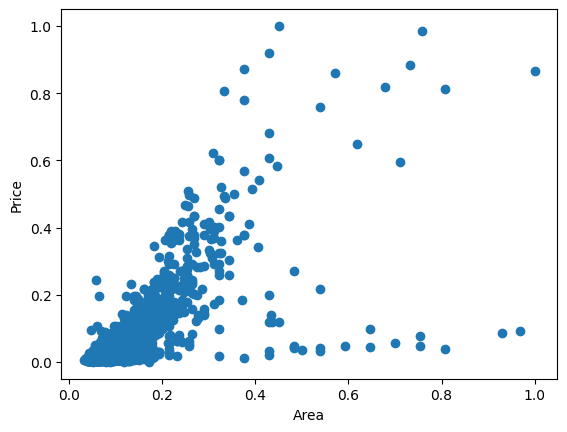

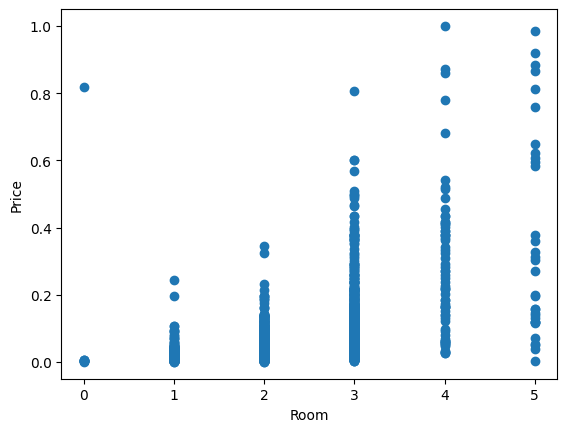

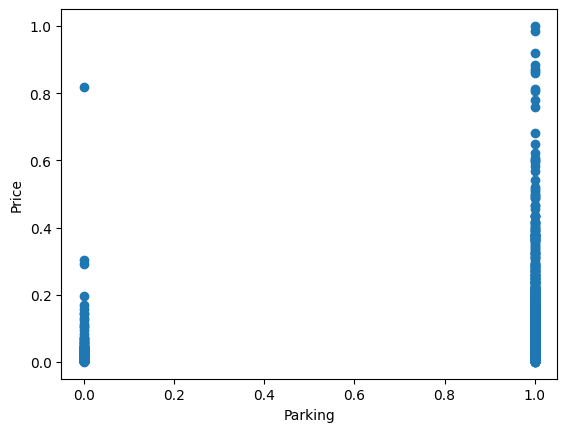

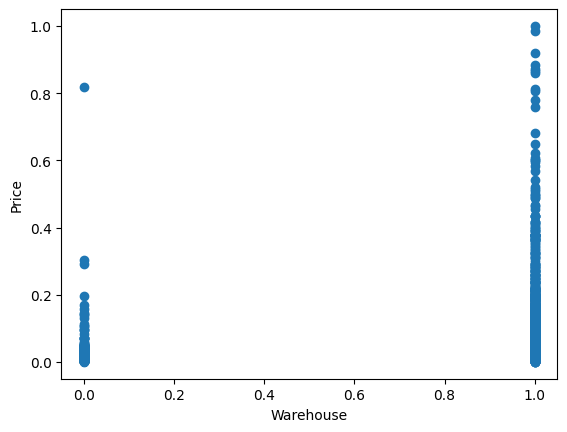

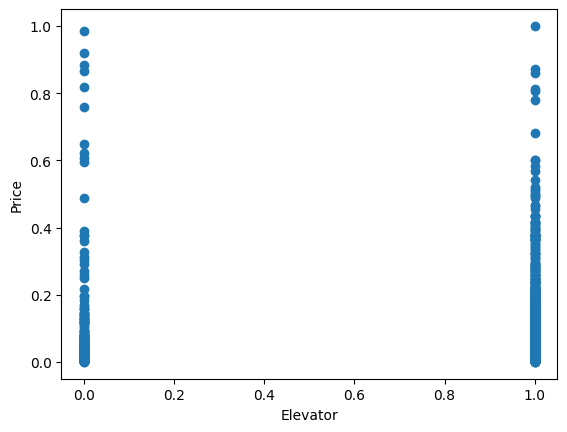

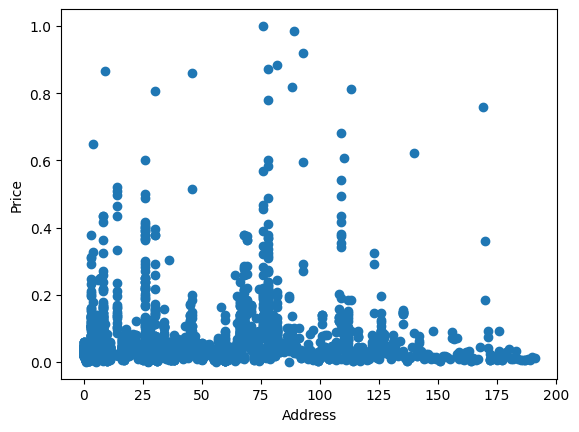

In [24]:
# plt.subplot(1,2,1)
plt.scatter(cdf.Area_Normal, cdf.Price_Normal)
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

# plt.subplot(1,2,2)
plt.scatter(cdf.Room, cdf.Price_Normal)
plt.xlabel("Room")
plt.ylabel('Price')
plt.show()

# plt.subplot(2,2,1)
plt.scatter(cdf.Parking, cdf.Price_Normal)
plt.xlabel("Parking")
plt.ylabel('Price')
plt.show()

plt.scatter(cdf.Warehouse, cdf.Price_Normal)
plt.xlabel("Warehouse")
plt.ylabel('Price')
plt.show()

plt.scatter(cdf.Elevator, cdf.Price_Normal)
plt.xlabel("Elevator")
plt.ylabel('Price')
plt.show()


plt.scatter(cdf.Address, cdf.Price_Normal)
plt.xlabel("Address")
plt.ylabel('Price')
plt.show()

# train and test data

In [16]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]


# Multiple Regression

## train data

In [18]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Area_Normal', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address']])
y = np.asanyarray(train[['Price_Normal']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print(f'Intercept : ', regr.intercept_)

Coefficients:  [[ 8.84432483e-01  6.59420463e-03 -1.73196584e-03  1.47860238e-02
   8.96443132e-03  6.46511798e-05]]
Intercept :  [-0.07890028]


In [20]:
model = regr.intercept_[0] + ( (regr.coef_[0][0] * cdf['Area_Normal']) + (regr.coef_[0][1] * cdf['Room']) 
                              + (regr.coef_[0][2] * cdf['Parking']) + (regr.coef_[0][3] * cdf['Warehouse'])
                              + (regr.coef_[0][0] * cdf['Elevator']) + (regr.coef_[0][0] * cdf['Address']))
model

0        0.885158
1        0.882302
2        1.791417
3        2.691082
4        3.602171
          ...    
3474    15.064569
3475    69.896527
3476    23.885367
3477    41.615632
3478    24.791250
Length: 3450, dtype: float64

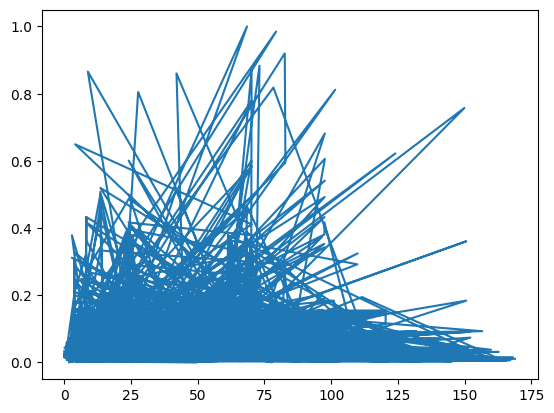

In [21]:
plt.plot(model, cdf.Price_Normal)

## predice

In [23]:
from sklearn.metrics import r2_score

y_hat= regr.predict(test[['Area_Normal', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address']])
x = np.asanyarray(test[['Area_Normal', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address']])
y = np.asanyarray(test[['Price_Normal']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))
print(f'r2 score is : {r2_score(y, y_hat)}')

Residual sum of squares: 0.01
Variance score: 0.22
r2 score is : 0.21874286636716733


c:\Users\azizi\Desktop\Programs\machine learning\venv\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
